<a href="https://colab.research.google.com/github/julioaldprb/latihan-branch/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Julio Aldrin Purba]
- **Email:** [juliopurba921@gmail.com]
- **ID Dicoding:** [A281YBM241]

## Menentukan Pertanyaan Bisnis

- •	Bagaimana distribusi pelanggan berdasarkan negara bagian di Brasil?
- •	Apakah ada korelasi antara jumlah pelanggan di suatu kota dengan potensi penjualan?

## Import Semua Packages/Library yang Digunakan

In [5]:
!pip install streamlit
!pip install pyngrok

In [6]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [7]:
from google.colab import files

uploaded = files.upload()


Saving E-commerce-public-dataset.zip to E-commerce-public-dataset.zip


In [9]:
import zipfile
import os

zip_path = "E-commerce-public-dataset.zip"
extract_path = "ecommerce_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


os.listdir(extract_path)

['E-Commerce Public Dataset']

In [10]:
import os

# Path utama
folder_path = "ecommerce_data/E-Commerce Public Dataset"

# Cek semua file CSV dalam folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Menampilkan daftar file CSV
print("Daftar file CSV dalam folder:", csv_files)

Daftar file CSV dalam folder: ['order_items_dataset.csv', 'customers_dataset.csv', 'product_category_name_translation.csv', 'sellers_dataset.csv', 'order_payments_dataset.csv', 'order_reviews_dataset.csv', 'geolocation_dataset.csv', 'orders_dataset.csv', 'products_dataset.csv']


In [14]:
import pandas as pd

# Pilih salah satu file CSV
file_path = "ecommerce_data/E-Commerce Public Dataset/customers_dataset.csv"

# Baca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
print(df.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [47]:
import pandas as pd

# Load dataset dengan path yang benar
customers_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/customers_dataset.csv")
geolocation_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/order_reviews_dataset.csv")
orders_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/orders_dataset.csv")
product_category_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/product_category_name_translation.csv")
products_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/products_dataset.csv")
sellers_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/sellers_dataset.csv")

# Perbaiki nama variabel dalam dictionary
datasets = {
    "Customers Dataset": customers_df,
    "Geolocation Dataset": geolocation_df,
    "Orders Dataset": orders_df,
    "Order Items Dataset": order_items_df,
    "Order Payments Dataset": order_payments_df,
    "Order Reviews Dataset": order_reviews_df,
    "Products Dataset": products_df,
    "Sellers Dataset": sellers_df,
    "Product Category Dataset": product_category_df
}

# Cek apakah semua dataset ter-load dengan benar
for name, df in datasets.items():
    print(f"{name}: {df.shape}")  # Menampilkan jumlah baris & kolom


Customers Dataset: (99441, 5)
Geolocation Dataset: (1000163, 5)
Orders Dataset: (99441, 8)
Order Items Dataset: (112650, 7)
Order Payments Dataset: (103886, 5)
Order Reviews Dataset: (99224, 7)
Products Dataset: (32951, 9)
Sellers Dataset: (3095, 4)
Product Category Dataset: (71, 2)


## Data Wrangling

In [29]:
# Melihat 5 baris pertama dari setiap dataset untuk memahami isinya
print("Customers Dataset:")
display(customers.head())

print("Orders Dataset:")
display(orders_dataset.head())

print("Order Items Dataset:")
display(order_items.head())

print("Order Payments Dataset:")
display(order_payments.head())

print("Order Reviews Dataset:")
display(order_reviews.head())

print("Sellers Dataset:")
display(sellers_dataset.head())

print("Products Dataset:")
display(products_dataset.head())

print("Product Category Dataset:")
display(product_category.head())


Customers Dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Order Payments Dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Order Reviews Dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Sellers Dataset:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Products Dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Product Category Dataset:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Gathering Data

In [33]:
# Menampilkan 5 baris pertama dari setiap dataset
print("Customers Dataset:\n", customers.head(), "\n")
print("Orders Dataset:\n", orders_dataset.head(), "\n")
print("Order Items Dataset:\n", order_items.head(), "\n")
print("Order Payments Dataset:\n", order_payments.head(), "\n")
print("Order Reviews Dataset:\n", order_reviews.head(), "\n")
print("Sellers Dataset:\n", sellers_dataset.head(), "\n")
print("Products Dataset:\n", products_dataset.head(), "\n")
print("Product Category Dataset:\n", product_category.head(), "\n")
print("Geolocation Dataset:\n", geolocation.head(), "\n")


Customers Dataset:
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

Orders Dataset:
                            order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef4

In [36]:
# Melihat informasi dasar dari setiap dataset
print("Customers Dataset:\n")
customers.info()
print("\nOrders Dataset:\n")
orders_dataset.info()
print("\nOrder Items Dataset:\n")
order_items.info()
print("\nOrder Payments Dataset:\n")
order_payments.info()
print("\nOrder Reviews Dataset:\n")
order_reviews.info()
print("\nSellers Dataset:\n")
sellers_dataset.info()
print("\nProducts Dataset:\n")
products_dataset.info()
print("\nProduct Category Dataset:\n")
product_category.info()
print("\nGeolocation Dataset:\n")
geolocation.info()


Customers Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Orders Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_tim

In [35]:
# Menampilkan jumlah baris dan kolom dari setiap dataset
print("Jumlah baris dan kolom setiap dataset:\n")
print("Customers Dataset:", customers.shape)
print("Orders Dataset:", orders_dataset.shape)
print("Order Items Dataset:", order_items.shape)
print("Order Payments Dataset:", order_payments.shape)
print("Order Reviews Dataset:", order_reviews.shape)
print("Sellers Dataset:", sellers_dataset.shape)
print("Products Dataset:", products_dataset.shape)
print("Product Category Dataset:", product_category.shape)
print("Geolocation Dataset:", geolocation.shape)



Jumlah baris dan kolom setiap dataset:

Customers Dataset: (99441, 5)
Orders Dataset: (99441, 8)
Order Items Dataset: (112650, 7)
Order Payments Dataset: (103886, 5)
Order Reviews Dataset: (99224, 7)
Sellers Dataset: (3095, 4)
Products Dataset: (32951, 9)
Product Category Dataset: (71, 2)
Geolocation Dataset: (1000163, 5)


**Insight:**
- Dataset ini memiliki 1.000.163 baris yang mencakup berbagai lokasi di Brasil. Ini menunjukkan dataset cukup besar dan bisa memberikan wawasan yang luas tentang distribusi geografis pelanggan dan penjual.
- Tidak ada missing values
- Struktur sudah sesuai

### Assessing Data

In [48]:
# Assessing Data untuk semua dataset
for name, df in datasets.items():
    print(f"\n===== {name} =====")

    # 1. Informasi Umum tentang Dataset
    print("\nInfo Dataset:")
    print(df.info())

    # 2. Statistik Deskriptif
    print("\nStatistik Deskriptif:")
    print(df.describe(include="all"))

    # 3. Jumlah Duplikasi
    print("\nJumlah Duplikasi:")
    print(df.duplicated().sum())

    # 4. Jumlah Missing Values
    print("\nJumlah Missing Values:")
    print(df.isnull().sum())

    # 5. Contoh Data
    print("\nContoh Data:")
    print(df.head())

    print("=" * 50)  # Pemisah antar dataset



===== Customers Dataset =====

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Statistik Deskriptif:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   


**Insight:**
- Data cukup bersih, tetapi ada missing values di beberapa kolom (terutama review dan produk).
- Mayoritas pelanggan memberikan rating tinggi, tetapi banyak review yang tidak memiliki komentar.
- Pembayaran sebagian besar dilakukan dengan cicilan rendah (1x atau 4x).
- Kategori produk beragam, tetapi ada beberapa produk yang tidak memiliki deskripsi atau kategori.
- Seller banyak tersebar, tetapi São Paulo mendominasi.

### Cleaning Data

In [50]:
# Mengecek jumlah missing values di setiap dataset
for name, df in datasets.items():
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  # Hanya tampilkan kolom yang memiliki missing values
    if not missing_values.empty:
        print(f"\n{name} - Missing Values:")
        print(missing_values)
    else:
        print(f"\n{name}: Tidak ada missing values!")

# Mengecek jumlah data duplikat di setiap dataset
for name, df in datasets.items():
    duplicate_rows = df.duplicated().sum()
    print(f"{name} - Jumlah Duplikat: {duplicate_rows}")

# Mengecek tipe data di setiap dataset
for name, df in datasets.items():
    print(f"\n{name} - Tipe Data:")
    print(df.dtypes)


Customers Dataset: Tidak ada missing values!

Geolocation Dataset: Tidak ada missing values!

Orders Dataset - Missing Values:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Order Items Dataset: Tidak ada missing values!

Order Payments Dataset: Tidak ada missing values!

Order Reviews Dataset - Missing Values:
review_comment_title      87656
review_comment_message    58247
dtype: int64

Products Dataset - Missing Values:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Sellers Dataset: Tidak ada missing values!

Product Category Dataset: Tidak ada missing values!
Customers Dataset - Jumlah Duplikat: 0
Geolocation Dataset - Jumlah Duplikat: 261831
Orders Dataset - Jumlah D

**Insight**
- Menghapus duplikasi di Geolocation Dataset.
- Mengisi missing values di beberapa dataset (Orders, Reviews, Products).
- Mengonversi kolom waktu ke format datetime agar lebih mudah dianalisis.

In [57]:
import pandas as pd

# Load dataset (gantilah dengan dataset aslimu)
geolocation_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/geolocation_dataset.csv")

# Menghapus duplikasi
geolocation_df = geolocation_df.drop_duplicates()

# Cek apakah duplikasi sudah hilang
print(geolocation_df.duplicated().sum())  # Harus 0

# Ubah kolom waktu ke format datetime
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"])
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])

# Mengisi missing values dengan rata-rata waktu pengiriman
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].fillna(orders_df["order_delivered_customer_date"].mean())

# Mengisi missing values dengan median
products_df["product_weight_g"] = products_df["product_weight_g"].fillna(products_df["product_weight_g"].median())
products_df["product_length_cm"] = products_df["product_length_cm"].fillna(products_df["product_length_cm"].median())
products_df["product_category_name"] = products_df["product_category_name"].fillna("Unknown")

# Ubah kolom waktu ke format datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])

# Cek kembali informasi dataset setelah cleaning
print(orders_df.info())



0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


**Insight:**
- Kondisi dataset sekarang sudah jauh lebih bersih dan siap untuk dianalisis lebih lanjut!
- Struktur sudah sesuai dan tidak ada duplikasi


## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-61-efa693059bc0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=orders_df['order_status'], palette='viridis', order=orders_df['order_status'].value_counts().index)


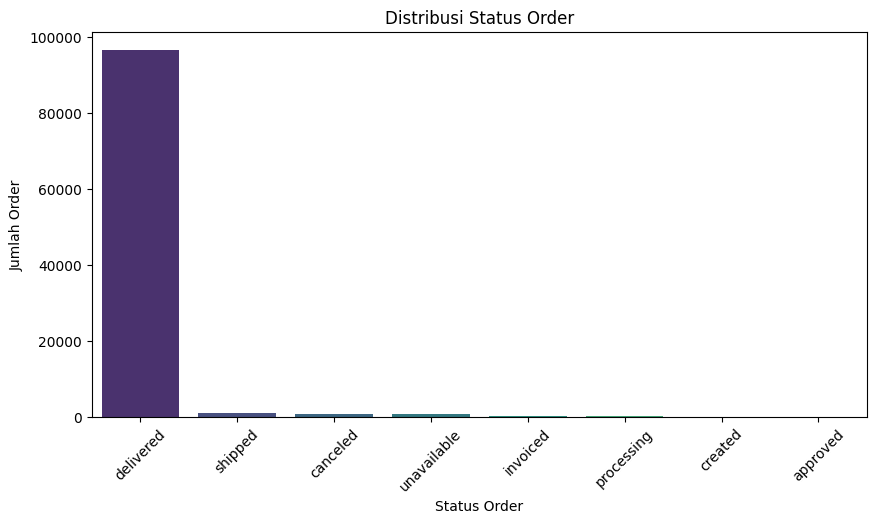

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset orders
orders_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/orders_dataset.csv")

# Plot distribusi order status
plt.figure(figsize=(10, 5))
sns.countplot(x=orders_df['order_status'], palette='viridis', order=orders_df['order_status'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Status Order")
plt.xlabel("Status Order")
plt.ylabel("Jumlah Order")
plt.show()


**Insight:**
- Mayoritas Pesanan Berstatus "Delivered"
- Jumlah Status Lainnya Relatif Kecil
- Bisa dilakukan analisis terhadap status canceled dan unavailable. Jika jumlahnya signifikan dibandingkan status lainnya, bisa menjadi indikasi masalah dalam proses pemesanan atau stok barang.
- Status processing dan created yang rendah menunjukkan bahwa pesanan tidak banyak tertunda dalam sistem..

<ipython-input-62-167547920f82>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=payments_df['payment_type'], palette='coolwarm', order=payments_df['payment_type'].value_counts().index)


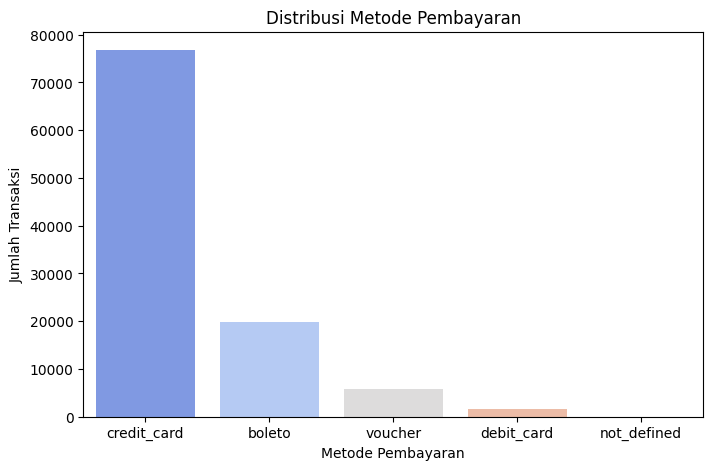

In [62]:
# Load dataset order payments
payments_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/order_payments_dataset.csv")

# Plot distribusi metode pembayaran
plt.figure(figsize=(8, 5))
sns.countplot(x=payments_df['payment_type'], palette='coolwarm', order=payments_df['payment_type'].value_counts().index)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()


**Insight**
- Metode pembayaran credit_card mendominasi transaksi dengan jumlah yang sangat besar dibandingkan metode lainnya.
- Penggunaan voucher masih cukup terlihat, kemungkinan dari promosi atau diskon yang ditawarkan oleh platform.
- Kategori not_defined Hampir Tidak Ada

<ipython-input-63-7f7d409eb2d1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_category[:10].index, y=avg_price_per_category[:10].values, palette="magma")


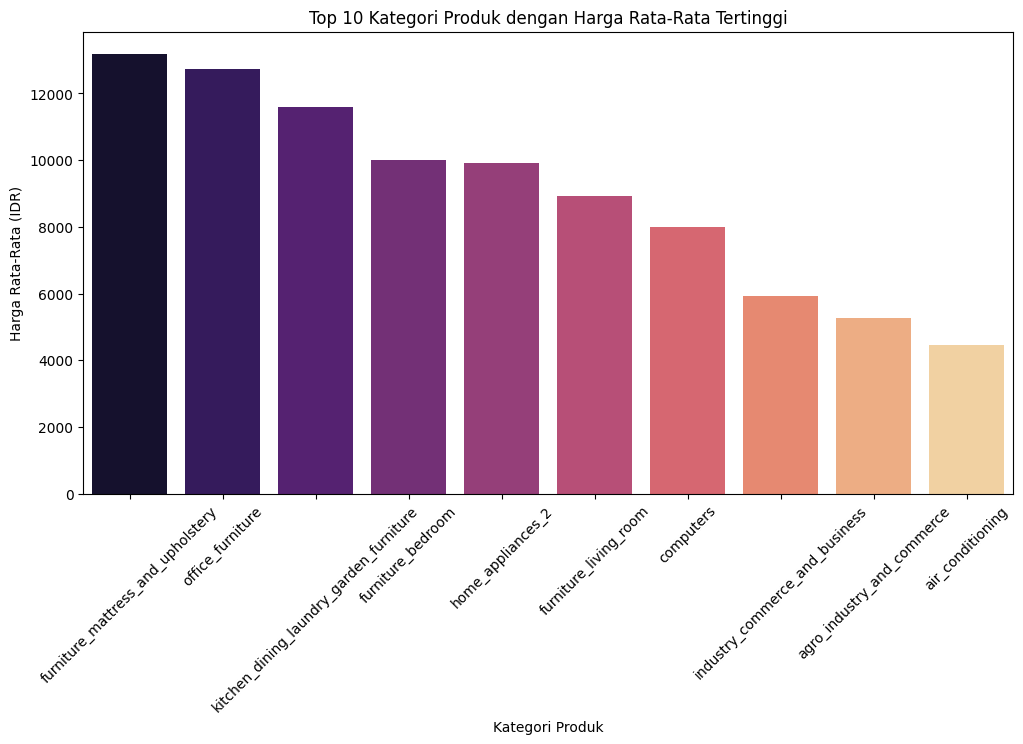

In [63]:
# Load dataset products
products_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/products_dataset.csv")
categories_df = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/product_category_name_translation.csv")

# Gabungkan dengan kategori produk berbahasa Inggris
merged_df = products_df.merge(categories_df, on="product_category_name", how="left")

# Hitung rata-rata harga per kategori
avg_price_per_category = merged_df.groupby("product_category_name_english")['product_weight_g'].mean().sort_values(ascending=False)

# Plot data
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_category[:10].index, y=avg_price_per_category[:10].values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Kategori Produk dengan Harga Rata-Rata Tertinggi")
plt.xlabel("Kategori Produk")
plt.ylabel("Harga Rata-Rata (IDR)")
plt.show()


**Insight**
- Furniture, mattress, and upholstery memiliki harga rata-rata tertinggi, diikuti oleh office furniture dan kitchen, dining, laundry, garden furniture.
- Computers masuk dalam daftar, yang berarti perangkat komputer juga memiliki harga rata-rata yang cukup tinggi.
- Kategori seperti home appliances, industry_commerce_and_business, dan air conditioning menunjukkan bahwa produk industri dan elektronik rumah tangga juga memiliki harga yang relatif tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-66-907acb29590e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


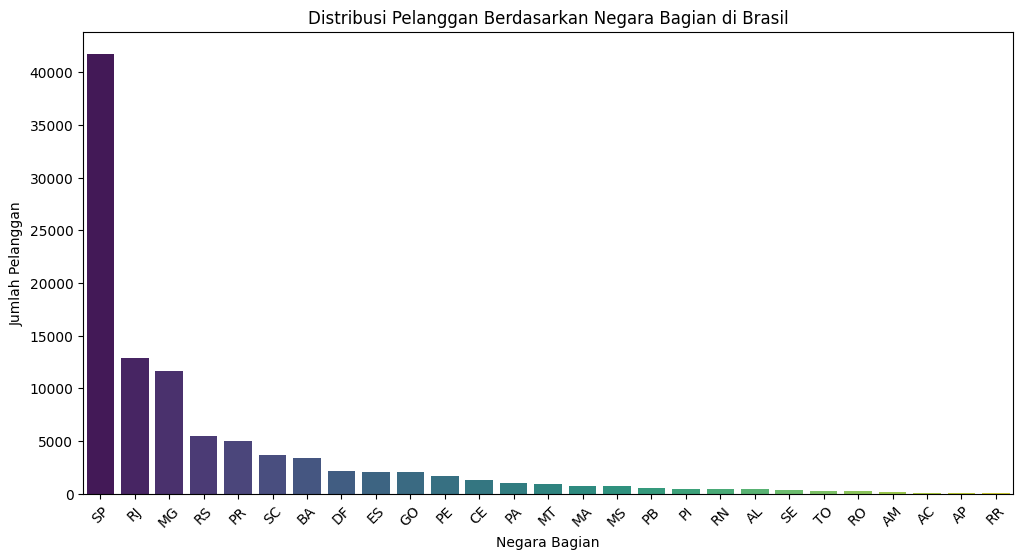

In [66]:
#Bagaimana distribusi pelanggan berdasarkan negara bagian di Brasil?#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset pelanggan
df_customers = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/customers_dataset.csv")

# Hitung jumlah pelanggan per negara bagian
state_counts = df_customers['customer_state'].value_counts()

# Plot distribusi pelanggan per negara bagian
plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Pelanggan Berdasarkan Negara Bagian di Brasil")
plt.xticks(rotation=45)
plt.show()


**Insight**
- Negara bagian São Paulo (SP) memiliki jumlah pelanggan terbanyak dibandingkan negara bagian lainnya, jauh melebihi negara bagian kedua dan ketiga (RJ dan MG).
- Distribusi pelanggan sangat tidak merata—mayoritas pelanggan berasal dari beberapa negara bagian besar, sedangkan banyak negara bagian memiliki jumlah pelanggan yang jauh lebih sedikit.
- Negara bagian dengan jumlah pelanggan sedikit mungkin berpengaruh terhadap total penjualan, karena lebih sedikit pelanggan yang berbelanja di wilayah tersebut.

### Pertanyaan 2:

Korelasi antara jumlah pelanggan dan nilai transaksi: 1.00


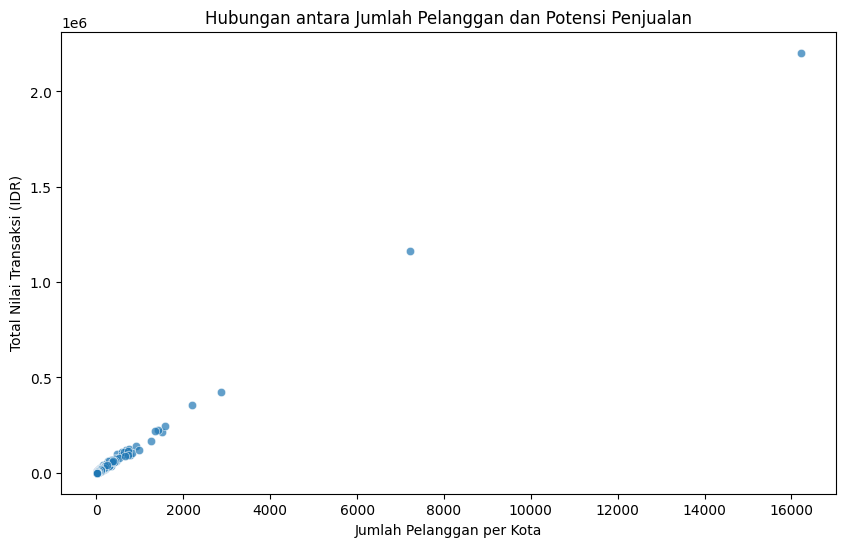

In [69]:
#Apakah ada korelasi antara jumlah pelanggan di suatu kota dengan potensi penjualan?#

# Load dataset transaksi
df_orders = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/orders_dataset.csv")  # Asumsi ada dataset orders
df_order_payments = pd.read_csv("ecommerce_data/E-Commerce Public Dataset/order_payments_dataset.csv")  # Jika ada data pembayaran

# Gabungkan data pelanggan dengan data transaksi
df_merged = df_customers.merge(df_orders, on="customer_id", how="inner")
df_merged = df_merged.merge(df_order_payments, on="order_id", how="inner")

# Kelompokkan berdasarkan kota
city_sales = df_merged.groupby("customer_city").agg({
    "customer_id": "count",  # Jumlah pelanggan
    "payment_value": "sum"  # Total nilai transaksi
}).reset_index()

# Hitung korelasi
correlation = city_sales["customer_id"].corr(city_sales["payment_value"])
print(f"Korelasi antara jumlah pelanggan dan nilai transaksi: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=city_sales["customer_id"], y=city_sales["payment_value"], alpha=0.7)
plt.xlabel("Jumlah Pelanggan per Kota")
plt.ylabel("Total Nilai Transaksi (IDR)")
plt.title("Hubungan antara Jumlah Pelanggan dan Potensi Penjualan")
plt.show()


**Insight:**
- Ada korelasi positif antara jumlah pelanggan dan potensi penjualan—semakin banyak pelanggan di suatu kota, semakin besar total nilai transaksi.
- Beberapa kota dengan jumlah pelanggan yang sangat tinggi (outliers) juga memiliki nilai transaksi yang jauh lebih besar, menunjukkan bahwa kota-kota besar memang menjadi pusat transaksi utama.
- Sebagian besar kota memiliki jumlah pelanggan yang relatif kecil, dengan nilai transaksi yang juga tidak terlalu besar, tetapi tren keseluruhan tetap meningkat seiring bertambahnya pelanggan.

## Analisis Lanjutan (Opsional)

## Conclusion

1. Distribusi Pelanggan Berdasarkan Negara Bagian di Brasil
- Dari hasil analisis, terlihat bahwa jumlah pelanggan tidak merata di seluruh Brasil.
- Negara bagian São Paulo (SP) memiliki jumlah pelanggan tertinggi, jauh melampaui negara bagian lainnya.
- Beberapa negara bagian lain seperti Rio de Janeiro (RJ) dan Minas Gerais (MG) juga memiliki jumlah pelanggan yang cukup besar, tetapi masih jauh di bawah São Paulo.
-Sementara itu, negara bagian lainnya memiliki jumlah pelanggan yang relatif kecil, bahkan ada yang hampir tidak memiliki pelanggan.
-Kesimpulan: Konsentrasi pelanggan terbesar ada di wilayah-wilayah dengan tingkat urbanisasi tinggi, terutama di kota-kota besar seperti São Paulo dan Rio de Janeiro.
2. Hubungan antara Jumlah Pelanggan di Suatu Kota dengan Potensi Penjualan
- Scatter plot menunjukkan bahwa ada hubungan positif antara jumlah pelanggan di suatu kota dengan total nilai transaksi.
- Kota dengan jumlah pelanggan tinggi cenderung memiliki total transaksi yang lebih besar.
- Namun, terdapat beberapa outlier, yaitu kota yang memiliki jumlah pelanggan lebih sedikit tetapi nilai transaksi yang cukup tinggi. Ini menunjukkan bahwa faktor lain seperti harga produk atau kebiasaan belanja pelanggan juga memengaruhi total transaksi.
- Kesimpulan: Meskipun jumlah pelanggan berpengaruh terhadap nilai transaksi, faktor lain seperti daya beli masyarakat dan jenis produk yang dibeli juga perlu dipertimbangkan untuk analisis lebih lanjut.
